In [99]:
from un_field import *
import math

In [100]:
def rad2degree(theta: float):
    return theta * 180 / math.pi

In [101]:
# params = {
#     "DMIN": 5.0,
#     "K0": 0.0,
#     "KR": 38,
#     "LDELTA": 1.94,
#     "RADIUS": 6.0
# }

params = {
    "DMIN": 3.5,
    "K0": 0.5,
    "KR": 4,
    "LDELTA": 3.5,
    "RADIUS": 6.0
}

In [102]:
univector = UnivectorField.from_dict(params)

In [103]:
origin_pos = Vec2D.origin()
target_pos = Vec2D(10,10)
approach_angle = 0 

# obst = []
obst = [Vec2D(2,8)]

In [104]:
theta = univector.get_angle(
    origin_pos,
    target_pos,
    approach_angle,
    obst
)

print(rad2degree(theta))

160.59598099274885


# Plot

In [105]:
from random import randint

In [106]:
# origin_pos = Vec2D(40, 65)
# target_pos = Vec2D(70,50)

origin_pos = Vec2D(randint(0, 150), randint(0, 130))
target_pos = Vec2D(randint(0, 150), randint(0, 130))

approach_angle = 0

# obst = []
obst = [
    Vec2D(randint(0, 150), randint(0, 130)),
    Vec2D(randint(0, 150), randint(0, 130)),
    Vec2D(randint(0, 150), randint(0, 130)),
    Vec2D(randint(0, 150), randint(0, 130)), 
    Vec2D(randint(0, 150), randint(0, 130))
]

In [107]:
import matplotlib.pyplot as plt

In [108]:
acceptance_radius = 4
step_size = 2
max_iter = 15000

In [109]:

axis_origins = []
axis = []

i = 0
copy_origin = origin_pos.copy()

while (origin_pos - target_pos).norm() > acceptance_radius:

    if i > max_iter: break

    theta = univector.get_angle(
        origin_pos,
        target_pos,
        approach_angle,
        obst
    )

    axis_to_follow = create_axis_from_angle(theta)

    axis_origins.append(origin_pos)
    axis.append(axis_to_follow)

    origin_pos += step_size * axis_to_follow

    i += 1




In [110]:
print(i)

39


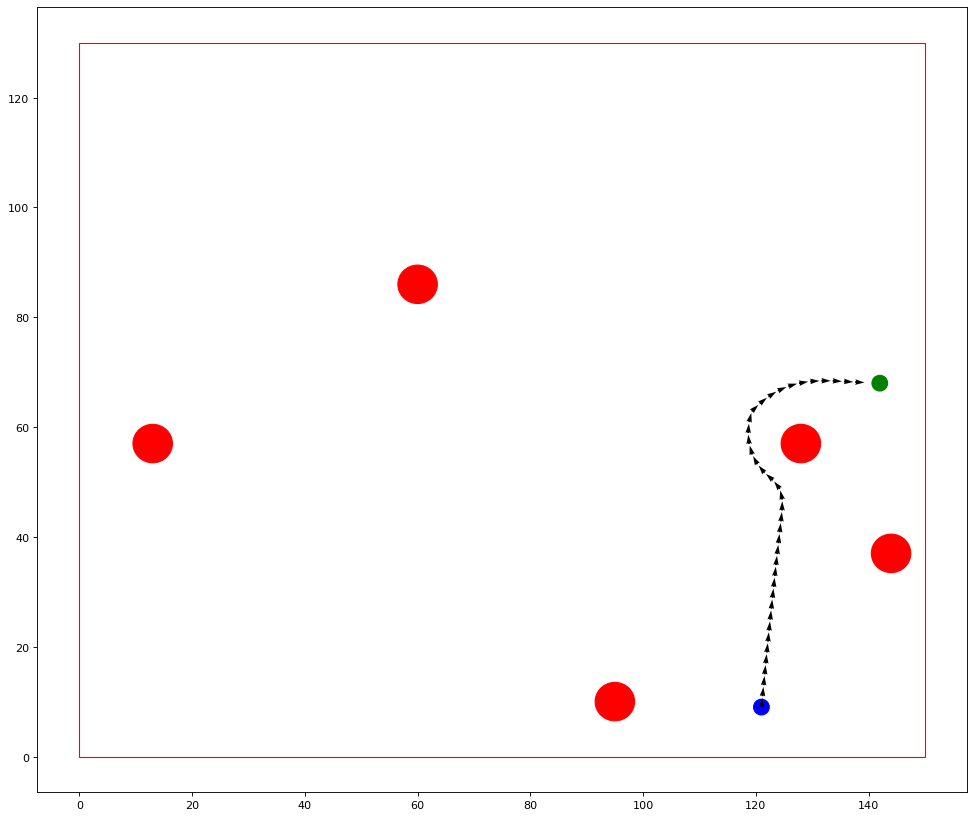

In [111]:
plt.figure(figsize=(15, 13), dpi=80)

# Origem e objetivo
a = plt.scatter(
    [copy_origin[0], target_pos[0]],
    [copy_origin[1], target_pos[1]], 
    color=["b", "g"], s=200
)

# Desenhando contornos da arena
rect = plt.Rectangle((0, 0), 150, 130, linewidth=1, edgecolor='r', facecolor='none')
a.axes.add_patch(rect)

# Obstáculos como círculos vermelhos
for ob in obst:
    circ = plt.Circle((ob[0], ob[1]), params["DMIN"], color='r')
    a.axes.add_patch(circ)

plt.quiver(
    [vec[0] for vec in axis_origins],
    [vec[1] for vec in axis_origins],
    [vec[0] for vec in axis],
    [vec[1] for vec in axis],
    scale=100
)